## Import Libraries and Load data | Day_Treatment_Rep

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [67]:
df = pd.read_csv('../materials/process_csv/weight_color_data.csv')
df['Day'] = df['Label'].apply(lambda x: x.split('_')[0])
df['Temp'] = df['Label'].apply(lambda x: x.split('_')[1])
df.drop('Label', axis=1, inplace=True)
df.head()

,Weight,R_Mean,R_Std,G_Mean,G_Std,B_Mean,B_Std,H_Mean,H_Std,S_Mean,...,V_Mean,V_Std,L_Mean,L_Std,a_Mean,a_Std,b_Mean,b_Std,Day,Temp
0,158.9,202.031017,63.184791,206.361271,55.761869,195.552566,74.087194,48.603222,56.316379,26.942528,...,207.003862,55.870933,208.442289,55.784846,124.388767,7.205789,133.458801,10.995181,0,5
1,154.5,196.388049,57.669474,200.363846,50.615080,189.855627,68.516092,63.280031,57.690568,26.164496,...,201.372722,50.922278,203.303091,50.910815,124.570902,7.112593,133.317630,10.926267,1,5
2,149.7,196.586956,56.816229,200.405571,50.129378,190.606173,67.044048,63.870066,57.068227,24.570594,...,201.448391,50.424279,203.433086,50.298129,124.747403,6.862492,132.948486,10.475270,2,5
3,148.4,206.840822,58.391917,210.816657,51.437818,201.517561,68.725207,52.674892,54.528216,22.998771,...,211.541725,51.588476,212.927224,51.478033,124.804936,6.758229,132.644228,10.385137,3,5
4,147.5,207.421014,58.118789,211.122241,51.420555,202.135509,68.412750,53.727779,56.380803,22.434080,...,211.884094,51.545167,213.275613,51.336971,124.952920,6.614468,132.517304,10.255598,4,5


In [68]:
df.shape

(337, 21)

In [69]:
df.columns

Index(['Weight', 'R_Mean', 'R_Std', 'G_Mean', 'G_Std', 'B_Mean', 'B_Std',
       'H_Mean', 'H_Std', 'S_Mean', 'S_Std', 'V_Mean', 'V_Std', 'L_Mean',
       'L_Std', 'a_Mean', 'a_Std', 'b_Mean', 'b_Std', 'Day', 'Temp'],
      dtype='object')

## Check corelation

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = df.corr()

# Extract correlations of weight with other features
weight_correlation = correlation_matrix["Weight"].sort_values(ascending=False)

# Display the correlation values
weight_correlation


Weight    1.000000
L_Std     0.700789
V_Std     0.700429
G_Std     0.700102
R_Std     0.683565
B_Std     0.593752
a_Std     0.375493
H_Mean    0.309004
H_Std     0.155902
S_Mean    0.056525
Day      -0.265821
S_Std    -0.311136
b_Mean   -0.375243
a_Mean   -0.504775
b_Std    -0.536113
B_Mean   -0.548385
Temp     -0.603423
G_Mean   -0.627770
V_Mean   -0.635145
L_Mean   -0.644982
R_Mean   -0.647381
Name: Weight, dtype: float64

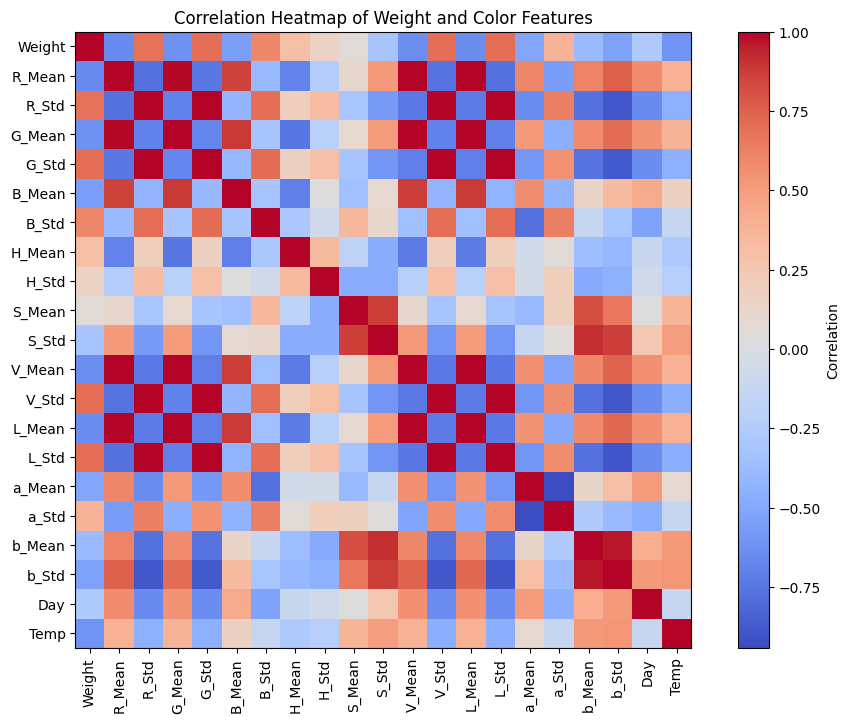

In [63]:


# # Set up the figure
plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create a heatmap using Matplotlib
plt.imshow(correlation_matrix, cmap="coolwarm", interpolation="nearest")
plt.colorbar(label="Correlation")

# Set axis labels
plt.xticks(ticks=np.arange(len(correlation_matrix.columns)), labels=correlation_matrix.columns, rotation=90)
plt.yticks(ticks=np.arange(len(correlation_matrix.index)), labels=correlation_matrix.index)

# Add title
plt.title("Correlation Heatmap of Weight and Color Features")

# Show the plot
plt.show()



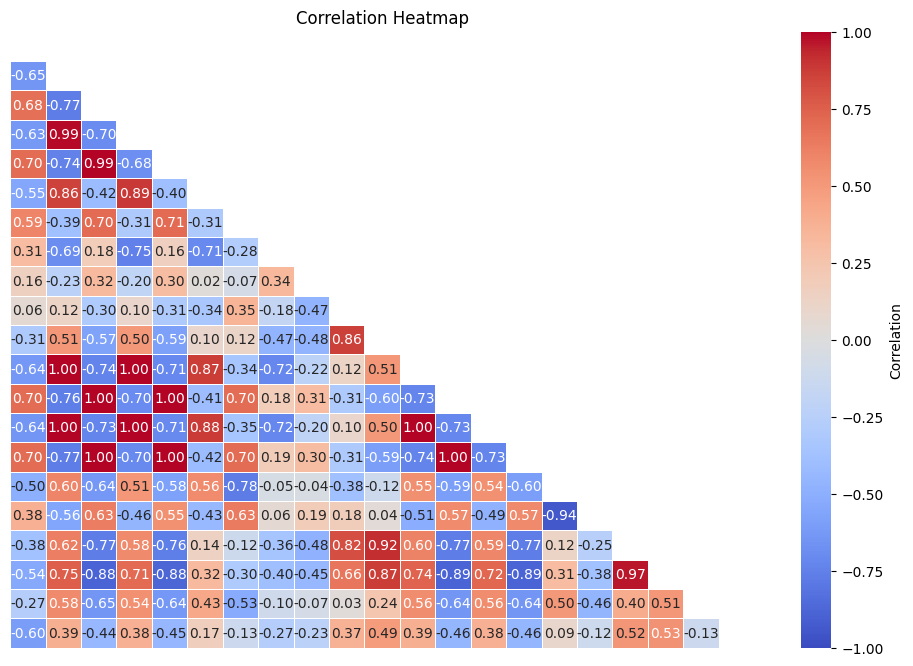

In [64]:


# Compute correlation matrix
corr_matrix = df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the figure
plt.figure(figsize=(12, 8))

# Apply the mask to hide the upper triangle
sns.heatmap(corr_matrix, mask=mask, cmap="coolwarm", annot=True, fmt=".2f",
            linewidths=0.5, vmin=-1, vmax=1, cbar_kws={"label": "Correlation"}, label=corr_matrix.columns)

# Remove feature labels from axes
plt.xticks([])
plt.yticks([])

# Add title
plt.title("Correlation Heatmap")

# Show the plot
plt.show()

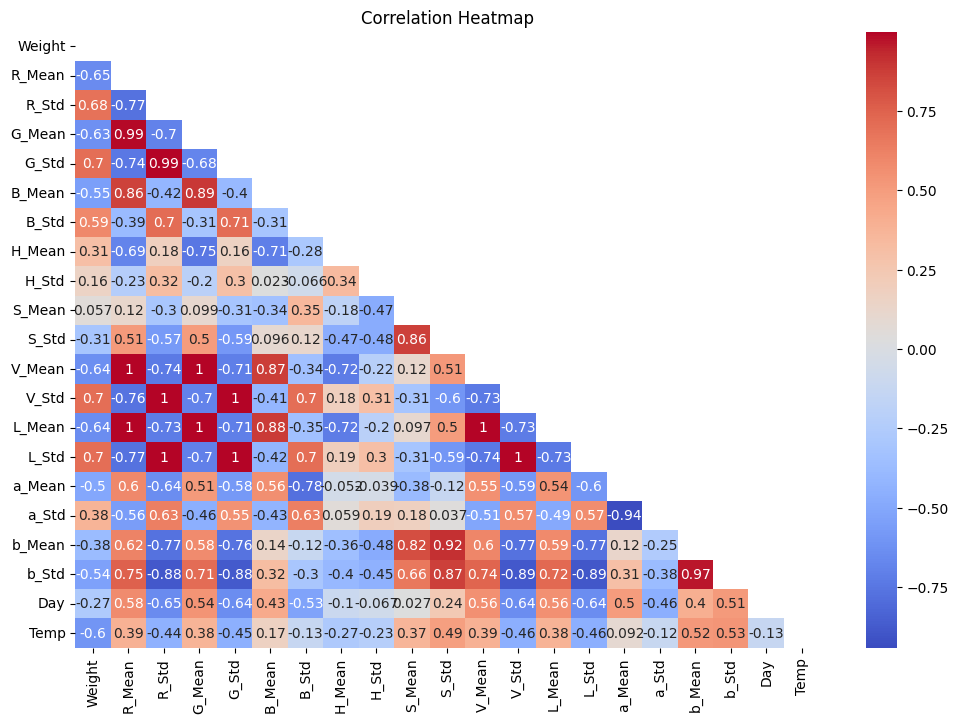

In [67]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap without labels
sns.heatmap(correlation_matrix, cmap="coolwarm", mask=mask, annot=True, cbar=True, xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.index)
plt.title("Correlation Heatmap")

# Show the heatmap
plt.show()

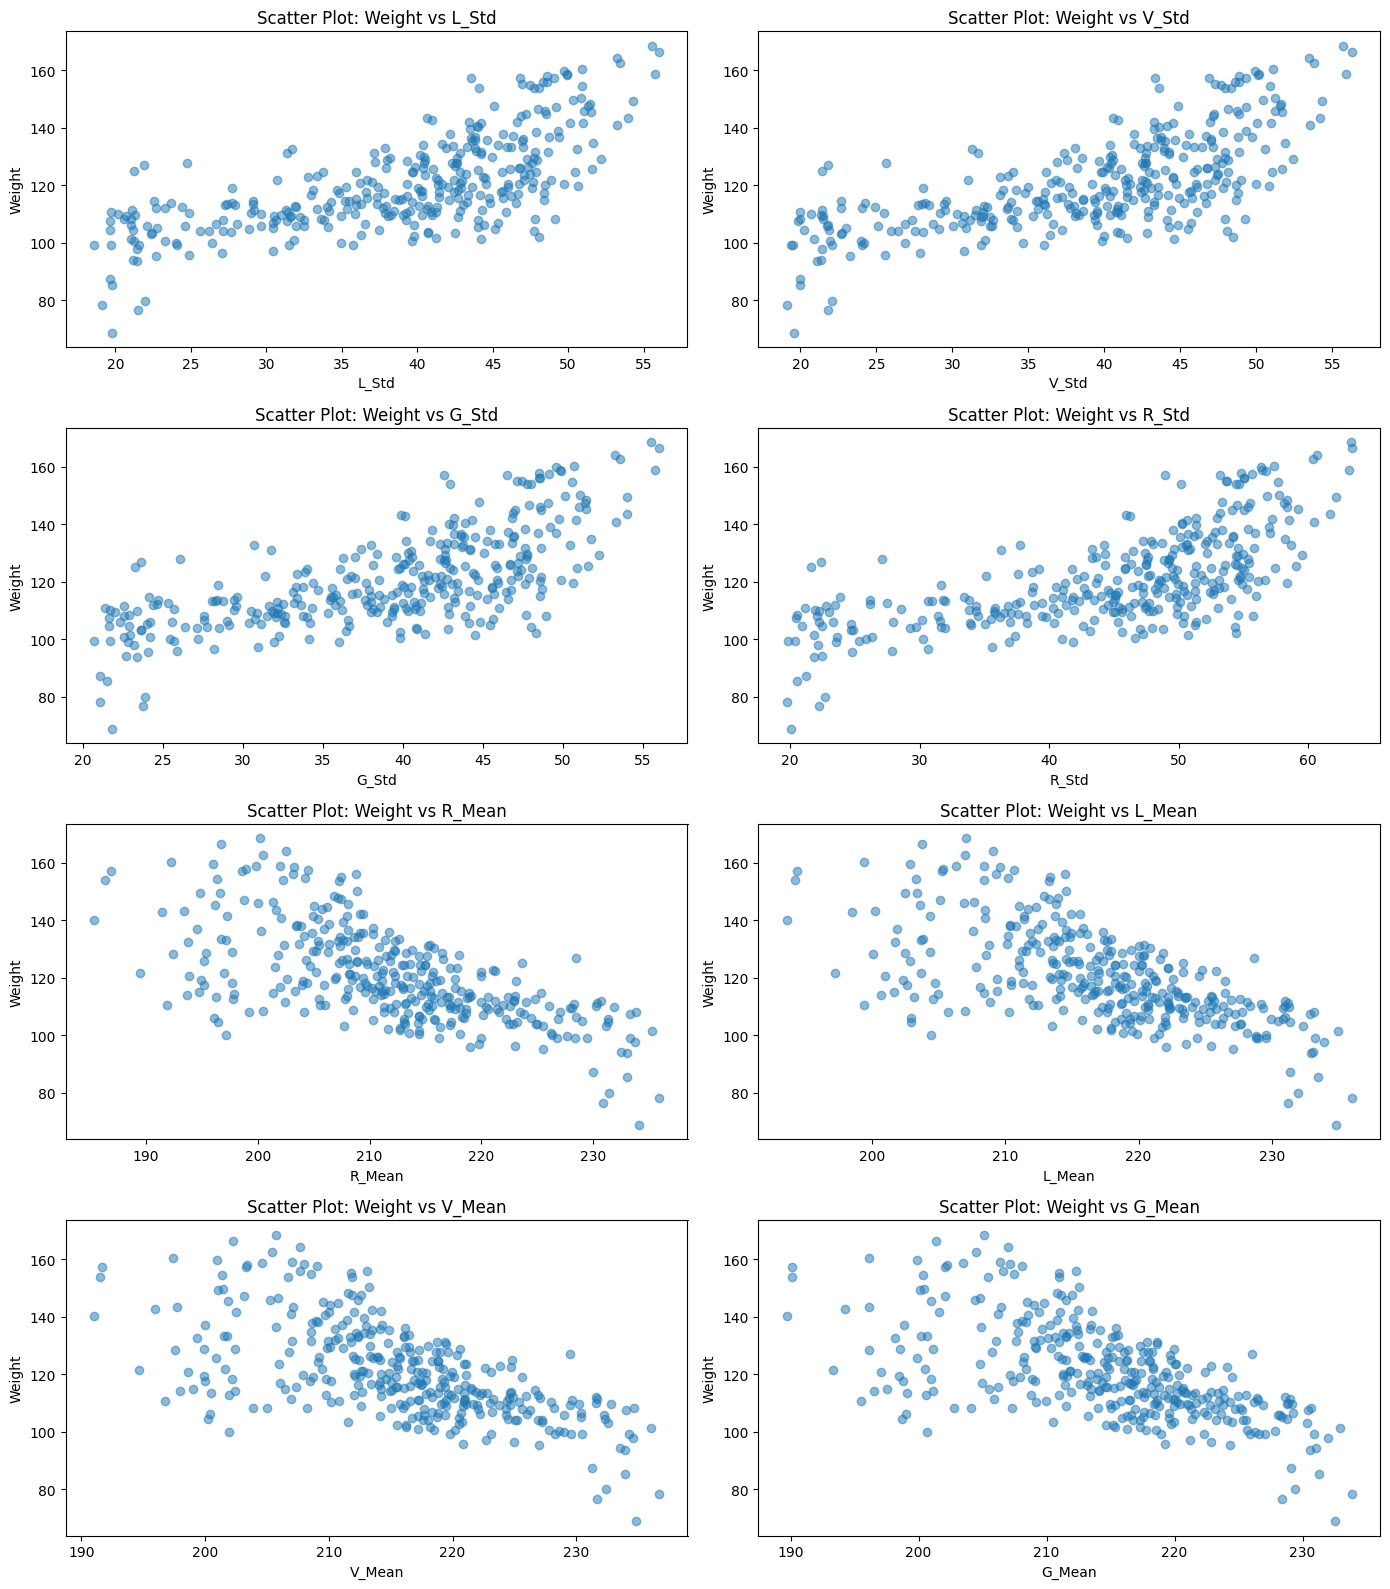

In [9]:

# Compute correlation matrix again
correlation_matrix = df.corr()

# Extract correlations of weight with other features
weight_correlation = correlation_matrix["Weight"].sort_values(ascending=False)

# Select the strongest correlations (both positive and negative)
strongest_features = ["L_Std", "V_Std", "G_Std", "R_Std", "R_Mean", "L_Mean", "V_Mean", "G_Mean"]

# Re-import necessary libraries for visualization
import matplotlib.pyplot as plt

# Create scatter plots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 16))

for ax, feature in zip(axes.flatten(), strongest_features):
    ax.scatter(df[feature], df["Weight"], alpha=0.5)
    ax.set_xlabel(feature)
    ax.set_ylabel("Weight")
    ax.set_title(f"Scatter Plot: Weight vs {feature}")

plt.tight_layout()
plt.show()


## Training

### Old Code

In [32]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, HuberRegressor, QuantileRegressor, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
import statsmodels.api as sm
import numpy as np

In [57]:
# Define base features
base_features = {
    "L": ["L_Mean", "L_Std"],
    "a": ["a_Mean", "a_Std"],
    "b": ["b_Mean", "b_Std"],
    "H": ["H_Mean", "H_Std"],
    "S": ["S_Mean", "S_Std"],
    "V": ["V_Mean", "V_Std"],
    "R": ["R_Mean", "R_Std"],
    "G": ["G_Mean", "G_Std"],
    "B": ["B_Mean", "B_Std"]
}

# Generate ratio feature groups dynamically
feature_groups = {}

for key1 in base_features.keys():
    # Store individual feature groups
    feature_groups[key1] = base_features[key1]
    
    for key2 in base_features.keys():
        if key1 != key2:  # Avoid self-pairing (L:L, a:a, etc.)
            group_name = f"{key1}{key2}"  # Example: La, Lb, LH, etc.
            feature_groups[group_name] = base_features[key1] + base_features[key2]  # Combine feature lists

for key1 in base_features.keys():
    # Store individual feature groups
    feature_groups[key1] = base_features[key1]
    
    for key2 in base_features.keys():
        if key1 != key2:  # Avoid self-pairing (L:L, a:a, etc.)
            group_name = f"{key1}{key2}"  # Example: La, Lb, LH, etc.
            feature_groups[group_name] = base_features[key1] + base_features[key2]  # Combine feature lists
            
            # Generate ratio-based features
            ratio_name = f"{key1}/{key2}"
            feature_groups[ratio_name] = [f"{base_features[key1][0]}/{base_features[key2][0]}",
                                          f"{base_features[key1][1]}/{base_features[key2][1]}"]

# Print generated feature groups
print("Generated Feature Groups:")
for k, v in feature_groups.items():
    print(f"{k}: {v}")



def evaluate_models(df, feature_groups):
    results = {}
    models = {
        "Simple Linear": LinearRegression(),
        "Multiple Linear": LinearRegression(),
        "Polynomial": make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
        "Ridge": Ridge(alpha=1.0),
        "Lasso": Lasso(alpha=0.1),
        "Elastic Net": ElasticNet(alpha=0.1, l1_ratio=0.5),
        "Robust": HuberRegressor(),
        "Quantile": QuantileRegressor(quantile=0.5, alpha=0.1),
        "Logistic": LogisticRegression()
    }
    
    for key, features in feature_groups.items():
        X = df[features]
        y = df["Weight"]
        
        # Split dataset
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        # Normalize data
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
      
        for model_name, model in models.items():
            if model_name == "Logistic":
                y_train_class = (y_train > y_train.median()).astype(int)
                y_test_class = (y_test > y_test.median()).astype(int)
                model.fit(X_train_scaled, y_train_class)
                y_pred = model.predict(X_test_scaled)
            else:
                model.fit(X_train_scaled, y_train)
                y_pred = model.predict(X_test_scaled)
            
            mse = mean_squared_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)
            
            results[f"{model_name} Regression_{key}"] = {"MSE": mse, "R2 Score": r2}
    
    return results

# Evaluate models
results = evaluate_models(df, feature_groups)

# Convert results to DataFrame
df_results = pd.DataFrame(results).T

# Display results
print("Regression Results (All Models):")
print(df_results)
df_results.to_csv('../materials/process_csv/evaluate_weight_color_data.csv')

Generated Feature Groups:
L: ['L_Mean', 'L_Std']
La: ['L_Mean', 'L_Std', 'a_Mean', 'a_Std']
Lb: ['L_Mean', 'L_Std', 'b_Mean', 'b_Std']
LH: ['L_Mean', 'L_Std', 'H_Mean', 'H_Std']
LS: ['L_Mean', 'L_Std', 'S_Mean', 'S_Std']
LV: ['L_Mean', 'L_Std', 'V_Mean', 'V_Std']
LR: ['L_Mean', 'L_Std', 'R_Mean', 'R_Std']
LG: ['L_Mean', 'L_Std', 'G_Mean', 'G_Std']
LB: ['L_Mean', 'L_Std', 'B_Mean', 'B_Std']
a: ['a_Mean', 'a_Std']
aL: ['a_Mean', 'a_Std', 'L_Mean', 'L_Std']
ab: ['a_Mean', 'a_Std', 'b_Mean', 'b_Std']
aH: ['a_Mean', 'a_Std', 'H_Mean', 'H_Std']
aS: ['a_Mean', 'a_Std', 'S_Mean', 'S_Std']
aV: ['a_Mean', 'a_Std', 'V_Mean', 'V_Std']
aR: ['a_Mean', 'a_Std', 'R_Mean', 'R_Std']
aG: ['a_Mean', 'a_Std', 'G_Mean', 'G_Std']
aB: ['a_Mean', 'a_Std', 'B_Mean', 'B_Std']
b: ['b_Mean', 'b_Std']
bL: ['b_Mean', 'b_Std', 'L_Mean', 'L_Std']
ba: ['b_Mean', 'b_Std', 'a_Mean', 'a_Std']
bH: ['b_Mean', 'b_Std', 'H_Mean', 'H_Std']
bS: ['b_Mean', 'b_Std', 'S_Mean', 'S_Std']
bV: ['b_Mean', 'b_Std', 'V_Mean', 'V_Std']
bR

KeyError: "None of [Index(['L_Mean/a_Mean', 'L_Std/a_Std'], dtype='object')] are in the [columns]"

In [61]:
print("Available Columns in DataFrame:")
print(df.columns)


Available Columns in DataFrame:
Index(['Label', 'Weight', 'R_Mean', 'R_Std', 'G_Mean', 'G_Std', 'B_Mean',
       'B_Std', 'H_Mean', 'H_Std', 'S_Mean', 'S_Std', 'V_Mean', 'V_Std',
       'L_Mean', 'L_Std', 'a_Mean', 'a_Std', 'b_Mean', 'b_Std'],
      dtype='object')


### Evaluate Model with Ratio

In [6]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, HuberRegressor, QuantileRegressor, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Define base features
base_features = {
    "L": ["L_Mean", "L_Std"],
    "a": ["a_Mean", "a_Std"],
    "b": ["b_Mean", "b_Std"],
    "H": ["H_Mean", "H_Std"],
    "S": ["S_Mean", "S_Std"],
    "V": ["V_Mean", "V_Std"],
    "R": ["R_Mean", "R_Std"],
    "G": ["G_Mean", "G_Std"],
    "B": ["B_Mean", "B_Std"]
}

# Function to generate ratio-based features
def generate_ratio_features(df, base_features):
    """Generate ratio-based columns dynamically and add them to the DataFrame."""
    for key1 in base_features.keys():
        for key2 in base_features.keys():
            if key1 != key2:  # Avoid self-division
                mean_ratio_col = f"{key1}_Mean/{key2}_Mean"
                std_ratio_col = f"{key1}_Std/{key2}_Std"
                
                # Compute ratios safely (avoid division by zero)
                df[mean_ratio_col] = np.where(df[base_features[key2][0]] == 0, np.nan, df[base_features[key1][0]] / df[base_features[key2][0]])
                df[std_ratio_col] = np.where(df[base_features[key2][1]] == 0, np.nan, df[base_features[key1][1]] / df[base_features[key2][1]])
    
    return df

# Generate feature groups dynamically
feature_groups = {}

for key1 in base_features.keys():
    feature_groups[key1] = base_features[key1]  # Individual features
    
    for key2 in base_features.keys():
        if key1 != key2:  # Avoid self-pairing
            group_name = f"{key1}{key2}"
            feature_groups[group_name] = base_features[key1] + base_features[key2]
            
            # Ensure ratio columns exist in `df`
            ratio_mean_col = f"{key1}_Mean/{key2}_Mean"
            ratio_std_col = f"{key1}_Std/{key2}_Std"
            
            feature_groups[f"{key1}/{key2}"] = [ratio_mean_col, ratio_std_col]

# Function to evaluate models
def evaluate_models(df, feature_groups):
    results = {}
    models = {
        "Simple Linear": LinearRegression(),
        "Multiple Linear": LinearRegression(),
        "Polynomial": make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
        "Ridge": Ridge(alpha=1.0),
        "Lasso": Lasso(alpha=0.1),
        "Elastic Net": ElasticNet(alpha=0.1, l1_ratio=0.5),
        "Robust": HuberRegressor(),
        "Quantile": QuantileRegressor(quantile=0.5, alpha=0.1),
        "Logistic": LogisticRegression()
    }
    
    for key, features in feature_groups.items():
        if all(feature in df.columns for feature in features):  # Ensure all features exist in DataFrame
            X = df[features]
            y = df["Weight"]
            
            # Split dataset
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
            
            # Normalize data
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)
            
            for model_name, model in models.items():
                if model_name == "Logistic":
                    y_train_class = (y_train > y_train.median()).astype(int)
                    y_test_class = (y_test > y_test.median()).astype(int)
                    model.fit(X_train_scaled, y_train_class)
                    y_pred = model.predict(X_test_scaled)
                else:
                    model.fit(X_train_scaled, y_train)
                    y_pred = model.predict(X_test_scaled)
                
                mse = mean_squared_error(y_test, y_pred)
                r2 = r2_score(y_test, y_pred)
                
                results[f"{model_name} Regression_{key}"] = {"MSE": mse, "R2 Score": r2}
    
    return results

# Load dataset (ensure df is loaded before running this script)
df = generate_ratio_features(df, base_features)

# Evaluate models
results = evaluate_models(df, feature_groups)

# Convert results to DataFrame
df_results = pd.DataFrame(results).T

# Display results
print("Regression Results (All Models):")
print(df_results)
df_results.to_csv('../materials/process_csv/evaluate_weight_color_data.csv')

Regression Results (All Models):
                                       MSE   R2 Score
Simple Linear Regression_L      109.987351   0.577673
Multiple Linear Regression_L    109.987351   0.577673
Polynomial Regression_L         102.820212   0.605193
Ridge Regression_L              109.982563   0.577691
Lasso Regression_L              110.328817   0.576361
...                                    ...        ...
Lasso Regression_B/G            132.680214   0.490537
Elastic Net Regression_B/G      139.500319   0.464349
Robust Regression_B/G           144.947495   0.443433
Quantile Regression_B/G         217.389276   0.165273
Logistic Regression_B/G       15330.256912 -57.864831

[1377 rows x 2 columns]


In [ ]:
import pandas as pd
import numpy as np
from itertools import combinations
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, HuberRegressor, QuantileRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# Define base features
base_features = ["R_Mean", "G_Mean", "B_Mean", "H_Mean", "S_Mean", "V_Mean", "L_Mean", "a_Mean", "b_Mean"]

# Generate feature combinations
feature_combinations = {}

# Single features
for feature in base_features:
    feature_combinations[feature] = [feature]

# Pairwise combinations
for comb in combinations(base_features, 2):
    feature_combinations[",".join(comb)] = list(comb)
    feature_combinations[":".join(comb)] = [comb[0], comb[1]]

# Three-way combinations
for comb in combinations(base_features, 3):
    feature_combinations[",".join(comb)] = list(comb)
    feature_combinations["[" + comb[0] + ":" + comb[1] + "]:" + "[" + comb[1] + ":" + comb[2] + "]"] = [comb[0], comb[1], comb[2]]

# Generate DataFrame with new ratio features
df_extended = df.copy()
for feature_name, features in feature_combinations.items():
    if "/" in feature_name:  # For ratio features
        f1, f2 = features[:2]
        df_extended[feature_name] = np.where(df_extended[f2] == 0, np.nan, df_extended[f1] / df_extended[f2])
    else:  # Other features remain unchanged
        pass

# Define models to test
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Polynomial Regression": make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
    "Elastic Net": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "Huber Regressor": HuberRegressor(),
    "Quantile Regressor": QuantileRegressor(quantile=0.5, alpha=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate models
results = []
for feature_name, feature_list in feature_combinations.items():
    X = df_extended[feature_list].copy()
    y = df_extended["Weight"]
    
    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Normalize data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    for model_name, model in models.items():
        # Train model
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        
        # Compute metrics
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        # Store results
        results.append({
            "Feature Set": feature_name,
            "Model": model_name,
            "MSE": mse,
            "R2 Score": r2
        })

# Convert results to DataFrame and save
df_results = pd.DataFrame(results)
df_results.to_csv("evaluate_weight_color_data-pair.csv", index=False)

print("Regression evaluation complete. Results saved to evaluate_weight_color_data.csv")


/home/jemiezler/Dev/Kale/kale_venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.906e+02, tolerance: 7.423e+00
  model = cd_fast.enet_coordinate_descent(
/home/jemiezler/Dev/Kale/kale_venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.906e+02, tolerance: 7.423e+00
  model = cd_fast.enet_coordinate_descent(
/home/jemiezler/Dev/Kale/kale_venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consi

Regression evaluation complete. Results saved to evaluate_weight_color_data.csv


### Rebase the code

In [70]:
import logging

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

In [71]:
import pandas as pd
from itertools import combinations
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, HuberRegressor, QuantileRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

base_features = {
    "L": ["L_Mean", "L_Std"],
    "a": ["a_Mean", "a_Std"],
    "b": ["b_Mean", "b_Std"],
    "H": ["H_Mean", "H_Std"],
    "S": ["S_Mean", "S_Std"],
    "V": ["V_Mean", "V_Std"],
    "R": ["R_Mean", "R_Std"],
    "G": ["G_Mean", "G_Std"],
    "B": ["B_Mean", "B_Std"],
    "Day": ["Day"],
}

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Polynomial Regression": make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
    "Elastic Net": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "Huber Regressor": HuberRegressor(),
    "Quantile Regressor": QuantileRegressor(quantile=0.5, alpha=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

In [72]:
def progressive_features(features_dict):
    feature_combinations = {}

    feature_groups = list(features_dict.keys())  # ["L", "a", "b", "H", ...]
    
    for i in range(1, len(feature_groups) + 1):
        for comb in combinations(feature_groups, i):  # Create feature group combinations
            combined_columns = sum([features_dict[key] for key in comb], [])  # Map to actual column names
            feature_combinations[",".join(comb)] = combined_columns

    print(f"Generated {len(feature_combinations)} feature combinations.")
    return feature_combinations



In [82]:
# 2️⃣ Train and evaluate models
def train_and_evaluate(X, y, feature_sets, models, output_csv_path):
    results = []

    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # ✅ Scale Data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Convert back to DataFrame
    X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

    for feature_name, feature_list in feature_sets.items():
        X_train_subset = X_train[feature_list]
        X_test_subset = X_test[feature_list]

        for model_name, model in models.items():
            model.fit(X_train_subset, y_train)
            y_pred = model.predict(X_test_subset)

            mse = mean_squared_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)

            # Store results
            results.append({
                "Feature Set": feature_name,
                "Model": model_name,
                "MSE": mse,
                "R2 Score": r2
            })

            logging.info(f"Features: {feature_name}, Model: {model_name}, MSE: {mse:.4f}, R2 Score: {r2:.4f}")

    # Save results
    df_results = pd.DataFrame(results)
    df_results.to_csv(output_csv_path, index=False)
    print(f"Regression evaluation complete. Results saved to {output_csv_path}")

In [83]:
# Define features (X) and target (y)
X = df[sum(base_features.values(), [])]
y = df["Weight"]

train_and_evaluate(X, y, progressive_features(base_features), models, "../output/train_csv/progressive.csv")

Generated 1023 feature combinations.


/home/jemiezler/Dev/Kale/kale_venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.982e+01, tolerance: 7.423e+00
  model = cd_fast.enet_coordinate_descent(
/home/jemiezler/Dev/Kale/kale_venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.788e+01, tolerance: 7.423e+00
  model = cd_fast.enet_coordinate_descent(
/home/jemiezler/Dev/Kale/kale_venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consi

Regression evaluation complete. Results saved to ../output/train_csv/progressive.csv
